In [14]:
import torch
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Task

In [16]:
import random
i = 0
a = -1
while a == -1:
    random.seed(i)
    if random.randint(0, 10) == 5:
        a = i
    i += 1

print(a)

7


## NN: classification

In [2]:
# 0 - номер рандомной последовательности

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [3]:
import sklearn.datasets
wine = sklearn.datasets.load_wine()
wine.data.shape

(178, 13)

In [4]:
pd.Series(wine) 

data             [[14.23, 1.71, 2.43, 15.6, 127.0, 2.8, 3.06, 0...
target           [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
frame                                                         None
target_names                           [class_0, class_1, class_2]
DESCR            .. _wine_dataset:\n\nWine recognition dataset\...
feature_names    [alcohol, malic_acid, ash, alcalinity_of_ash, ...
dtype: object

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    wine.data[:, :2], 
    wine.target, 
    test_size=0.3, 
    shuffle=True)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [21]:
wine.data[:, :2]

array([[14.23,  1.71],
       [13.2 ,  1.78],
       [13.16,  2.36],
       [14.37,  1.95],
       [13.24,  2.59],
       [14.2 ,  1.76],
       [14.39,  1.87],
       [14.06,  2.15],
       [14.83,  1.64],
       [13.86,  1.35],
       [14.1 ,  2.16],
       [14.12,  1.48],
       [13.75,  1.73],
       [14.75,  1.73],
       [14.38,  1.87],
       [13.63,  1.81],
       [14.3 ,  1.92],
       [13.83,  1.57],
       [14.19,  1.59],
       [13.64,  3.1 ],
       [14.06,  1.63],
       [12.93,  3.8 ],
       [13.71,  1.86],
       [12.85,  1.6 ],
       [13.5 ,  1.81],
       [13.05,  2.05],
       [13.39,  1.77],
       [13.3 ,  1.72],
       [13.87,  1.9 ],
       [14.02,  1.68],
       [13.73,  1.5 ],
       [13.58,  1.66],
       [13.68,  1.83],
       [13.76,  1.53],
       [13.51,  1.8 ],
       [13.48,  1.81],
       [13.28,  1.64],
       [13.05,  1.65],
       [13.07,  1.5 ],
       [14.22,  3.99],
       [13.56,  1.71],
       [13.41,  3.84],
       [13.88,  1.89],
       [13.

In [17]:
class WineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(WineNet, self).__init__()
        
        self.fc1 = torch.nn.Linear(2, n_hidden_neurons)
        self.activ1 = torch.nn.Sigmoid()
#         self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
#         self.activ2 = torch.nn.Sigmoid()
        self.fc3 = torch.nn.Linear(n_hidden_neurons, 3)
        self.sm = torch.nn.Softmax(dim=1)
        
#         dim=1 - применяем софтмакс построчно
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.activ1(x)
#         x = self.fc2(x)
#         x = self.activ2(x)
        x = self.fc3(x)
        return x

    def inference(self, x):
        x = self.forward(x)
        x = self.sm(x)
        return x
    
wine_net = WineNet(5)

In [18]:
# используем выходы сети, не пропущенные через софтмакс
loss = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(wine_net.parameters(), lr=1.0e-3)

In [8]:
np.random.permutation(5)

array([2, 0, 1, 4, 3])

In [19]:
batch_size = 10

for epoch in range(5000):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        x_batch = X_train[batch_indexes]
        y_batch = y_train[batch_indexes]
        
        preds = wine_net.forward(x_batch) 
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()
        
    if epoch % 100 == 0:
        test_preds = wine_net.forward(X_test)
        
#         max outcome
        test_preds = test_preds.argmax(dim=1)
        print((test_preds == y_test).float().mean())

tensor(0.2407)
tensor(0.5000)
tensor(0.4630)
tensor(0.4815)
tensor(0.6296)
tensor(0.7407)
tensor(0.6852)
tensor(0.7593)
tensor(0.7593)
tensor(0.7593)
tensor(0.7963)
tensor(0.7963)
tensor(0.8148)
tensor(0.8148)
tensor(0.8333)
tensor(0.8333)
tensor(0.8519)
tensor(0.8519)
tensor(0.8519)
tensor(0.8519)


KeyboardInterrupt: 

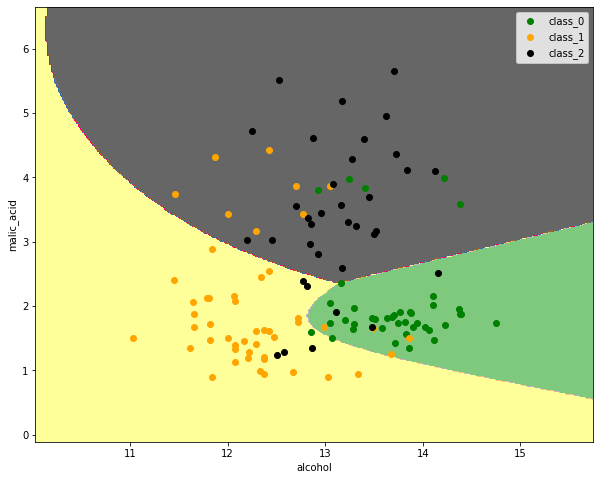

In [20]:
plt.rcParams['figure.figsize'] = (10, 8)

n_classes = 3
plot_colors = ['g', 'orange', 'black']
plot_step = 0.02

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

xx, yy =  torch.meshgrid(torch.arange(x_min, x_max, plot_step),
                         torch.arange(y_min, y_max, plot_step))

preds = wine_net.inference(
    torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1))

preds_class = preds.data.numpy().argmax(axis=1)
preds_class = preds_class.reshape(xx.shape)
plt.contourf(xx, yy, preds_class, cmap='Accent')

for i, color in zip(range(n_classes), plot_colors):
    indexes = np.where(y_train == i)
    plt.scatter(X_train[indexes, 0], 
                X_train[indexes, 1], 
                c=color, 
                label=wine.target_names[i],
                cmap='Accent')
    plt.xlabel(wine.feature_names[0])
    plt.ylabel(wine.feature_names[1])
    plt.legend()